<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%EC%97%AC%EB%9F%AC_sheet%EB%A5%BC_%EC%A2%85%ED%95%A9%ED%95%B4%EC%84%9C_%ED%94%BC%EB%B2%97%ED%85%8C%EC%9D%B4%EB%B8%94_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import openpyxl
days = openpyxl.load_workbook('/content/drive/MyDrive/python/데이터스테이션/data/D02EXAMPLE.xlsx').sheetnames[:7]

In [12]:
udf = pd.DataFrame([])
for i in days:
    udf1 = pd.read_excel('/content/drive/MyDrive/python/데이터스테이션/data/D02EXAMPLE.xlsx', sheet_name=i).set_index('제품')
    udf1 = udf1.stack().reset_index()
    udf1.columns = ['제품','지점','매출']
    udf1['날짜'] = i
    udf = pd.concat([udf,udf1])
udf

,제품,지점,매출,날짜
0,종합어묵 (300g),강남점,1930000,2021-08-30
1,종합어묵 (300g),서초점,1350000,2021-08-30
2,종합어묵 (300g),송파점,630000,2021-08-30
3,종합어묵 (300g),노원점,420000,2021-08-30
4,종합어묵 (300g),은평점,1360000,2021-08-30
...,...,...,...,...
3395,멸치가루 (120g),동인천점,1120000,2021-10-11
3396,멸치가루 (120g),분당점,1440000,2021-10-11
3397,멸치가루 (120g),일산점,1700000,2021-10-11
3398,멸치가루 (120g),부평점,1230000,2021-10-11


In [15]:
df1 = pd.read_excel('/content/drive/MyDrive/python/데이터스테이션/data/D02EXAMPLE.xlsx', sheet_name='지점구분')
df2 = pd.read_excel('/content/drive/MyDrive/python/데이터스테이션/data/D02EXAMPLE.xlsx', sheet_name='제품구분')
pdf1 = udf.merge(df1, how='left')
pdf1

,제품,지점,매출,날짜,지역,분류
0,종합어묵 (300g),강남점,1930000,2021-08-30,서울,직영점
1,종합어묵 (300g),서초점,1350000,2021-08-30,서울,직영점
2,종합어묵 (300g),송파점,630000,2021-08-30,서울,비직영점
3,종합어묵 (300g),노원점,420000,2021-08-30,서울,비직영점
4,종합어묵 (300g),은평점,1360000,2021-08-30,서울,비직영점
...,...,...,...,...,...,...
23795,멸치가루 (120g),동인천점,1120000,2021-10-11,인천,직영점
23796,멸치가루 (120g),분당점,1440000,2021-10-11,경기,비직영점
23797,멸치가루 (120g),일산점,1700000,2021-10-11,경기,직영점
23798,멸치가루 (120g),부평점,1230000,2021-10-11,인천,비직영점


In [16]:
pdf1.pivot_table('매출', index='날짜', columns='지역', aggfunc='sum')#.to_clipboard

지역,경기,서울,인천
날짜,,,
2021-08-30,1318210000,1544910000,870330000
2021-09-06,1299740000,1544090000,896060000
2021-09-13,1307740000,1527180000,893090000
2021-09-20,1292560000,1532560000,869670000
2021-09-27,1305330000,1532340000,880480000
2021-10-04,1305820000,1571650000,863930000
2021-10-11,1337700000,1549590000,856380000


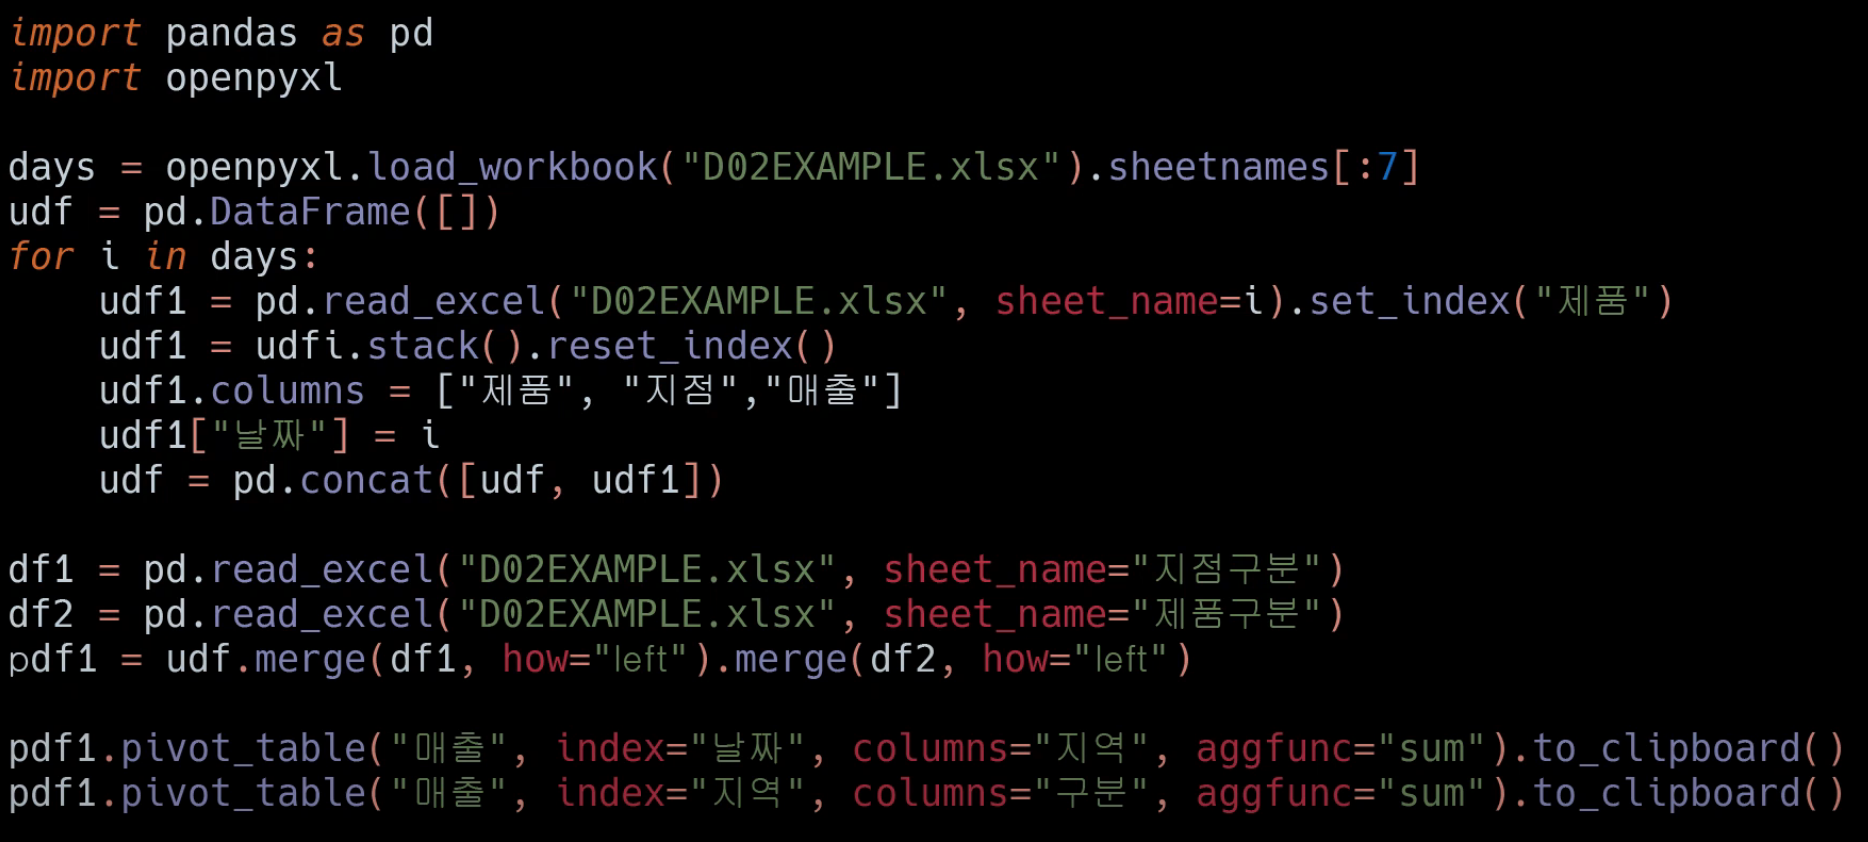